# Patient Networks from	Genomic	Data

In [2]:
import matplotlib.pyplot as plt
import networkx
import numpy as np
import pandas as pd

from copy import deepcopy

## Load dataframes

In [67]:
dataframes = []

for dataset in ("Gene", "Methy", "Mirna"):
    dataframe = pd.read_table(f"data/LUNG_{dataset}_Expression.tsv", header=0)
    dataframe_cols = list(dataframe.columns[1:])
    # Estavamos a ler mal os ficheiros! A última coluna estava a Nan e o nome da 1º coluna era " "
    dataframe_cols.append("no_col")
    dataframe.columns = dataframe_cols
    dataframe.drop("no_col", axis=1, inplace=True)

    dataframes.append(dataframe)

dataframes[0].head()

,TCGA-18-3406-01A-01R-1031-01,TCGA-18-3407-01A-01R-1031-01,TCGA-18-3408-01A-01R-1031-01,TCGA-18-3410-01A-01R-1031-01,TCGA-18-3411-01A-01R-1031-01,TCGA-18-3412-01A-01R-1031-01,TCGA-18-3414-01A-01R-1031-01,TCGA-18-3415-01A-01R-1031-01,TCGA-18-3416-01A-01R-1031-01,TCGA-18-3419-01A-01R-1031-01,...,TCGA-66-2787-01A-01R-1031-01,TCGA-66-2788-01A-01R-1031-01,TCGA-66-2789-01A-01R-1031-01,TCGA-66-2790-01A-01R-1031-01,TCGA-66-2791-01A-01R-1031-01,TCGA-66-2792-01A-01R-1031-01,TCGA-66-2793-01A-01R-1199-01,TCGA-66-2794-01A-01R-1199-01,TCGA-66-2795-01A-02R-1031-01,TCGA-66-2800-01A-01R-1199-01
NTS,-0.806226,-0.382872,0.401741,-1.411283,0.753000,0.736499,0.884528,-0.658622,-1.364281,-0.026033,...,0.790486,1.034772,-0.702329,-1.199132,0.508934,0.970896,1.229138,0.112034,1.176520,0.344574
KRT14,1.479097,1.444322,-0.860771,-1.215284,0.393626,0.563601,0.050821,0.637788,-1.426153,-0.384999,...,-1.040541,1.419102,0.598151,-0.381585,0.993165,0.716151,-1.267115,-1.044408,0.583019,-0.377197
SPRR3,0.126642,1.202567,0.165575,-1.399032,-0.061173,1.229682,0.230877,1.055121,-0.371628,1.080481,...,-0.214095,1.181017,0.221319,-1.700355,-0.028831,0.894141,-0.121553,0.651901,-0.190551,0.994301
KRT13,1.103173,1.163743,0.068945,-0.861872,-1.101405,1.458346,-0.456045,0.360896,0.478252,1.018959,...,-0.505752,1.074723,0.184191,-0.222527,0.849239,0.838823,0.224248,0.346868,0.069941,-0.816551
UPK1B,-1.088276,-1.069109,0.674922,-1.130374,-1.070265,1.286183,1.492973,0.932590,0.047729,-1.082025,...,-0.859273,0.942833,0.586808,-0.725825,0.915616,1.189197,0.886122,1.345704,1.339203,1.064178


## Similarity matrix

In [68]:
correlations = (
    list(map(lambda x: x.corr(method="pearson"), dataframes)),
    list(map(lambda x: x.corr(method="spearman"), dataframes))
)

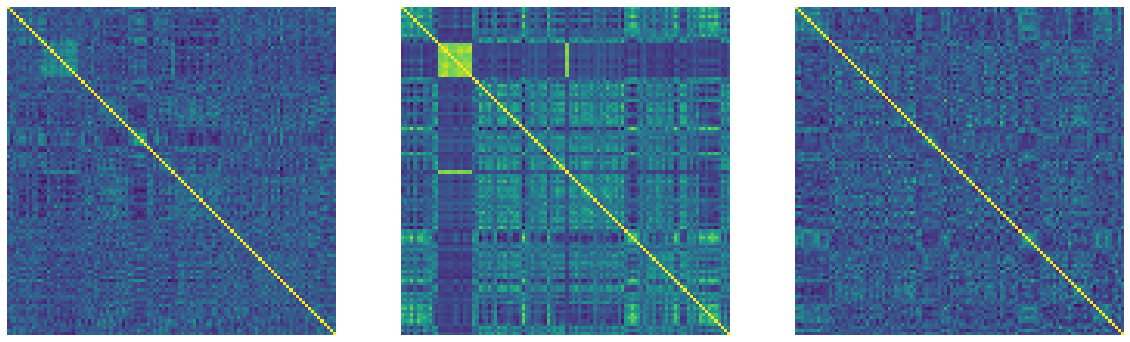

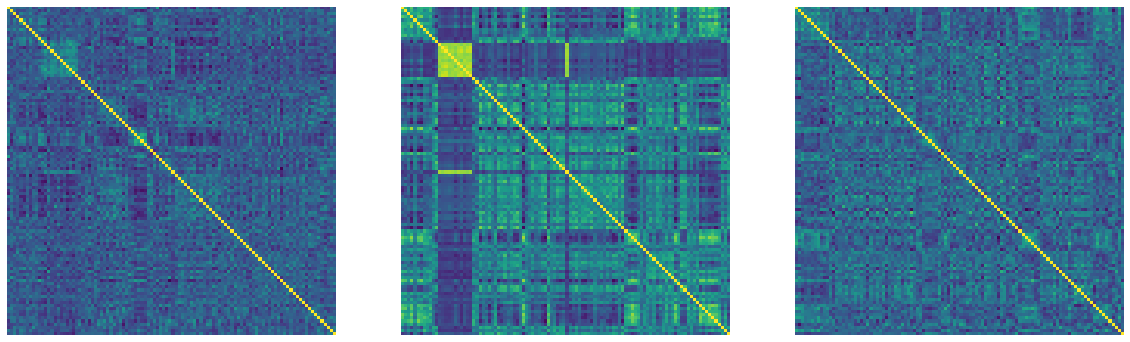

In [69]:
for correlation in correlations:
    figure, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 15))

    for i, matrix in enumerate(correlation):
        axes[i].matshow(matrix)
        axes[i].set_axis_off()

    plt.show()

## Threshold by correlation

In [70]:
threshold = 0.3
thresholded_correlations = deepcopy(correlations)

for i, correlation in enumerate(thresholded_correlations):    
    for j, matrix in enumerate(correlation):
        thresholded_correlations[i][j] = matrix[abs(matrix) >= threshold]

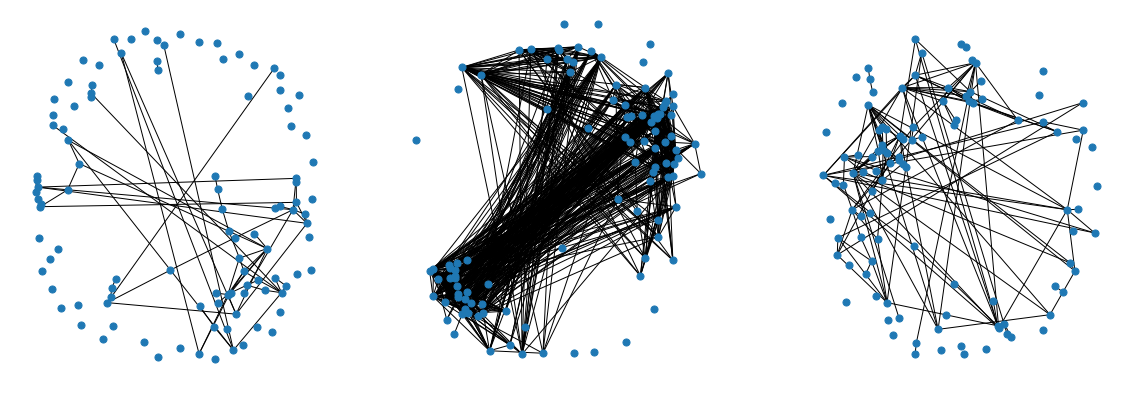

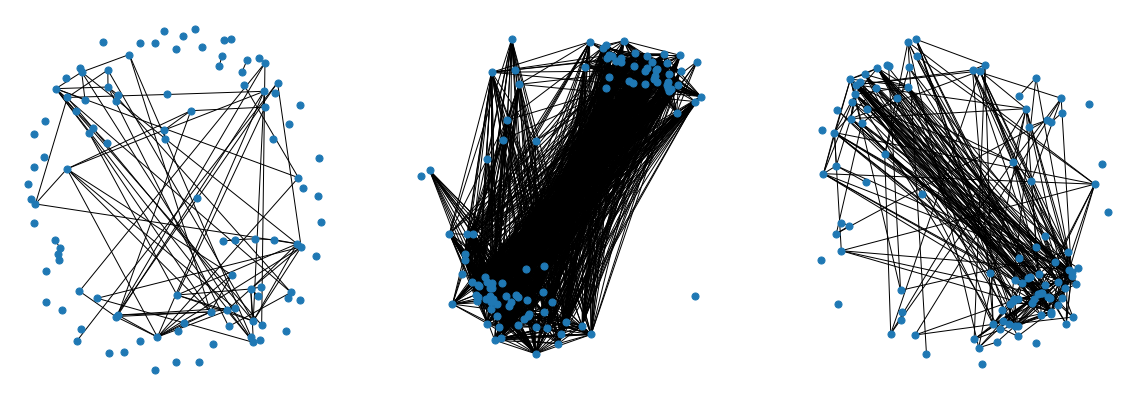

In [71]:
# TODO: Can we use plotly

def generate_network(correlation):
    adj_matrix = np.array(correlation.fillna(0))
    np.fill_diagonal(adj_matrix, 0)

    graph = networkx.from_numpy_array(adj_matrix)

    return graph

for correlation in thresholded_correlations:
    figure, axes = plt.subplots(1, 3, figsize=(20, 7))

    for i, matrix in enumerate(correlation):
        graph = generate_network(matrix)
        networkx.draw(graph, node_size=50, ax=axes[i])

        axes[i].set_axis_off()

    plt.show()

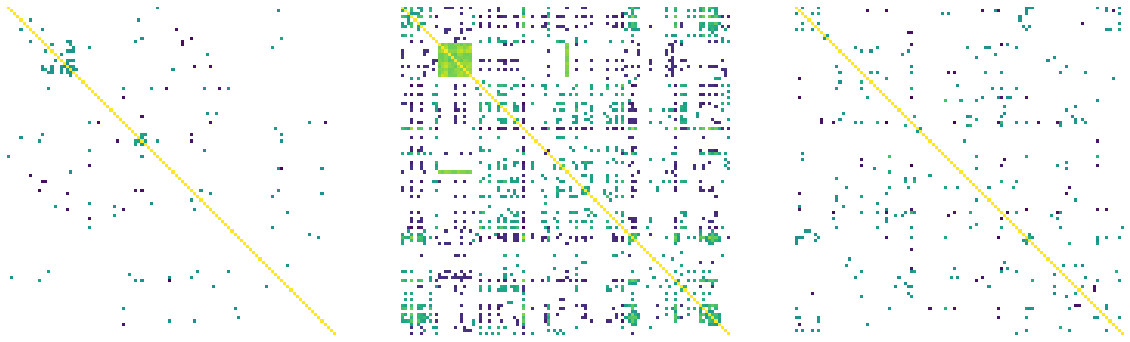

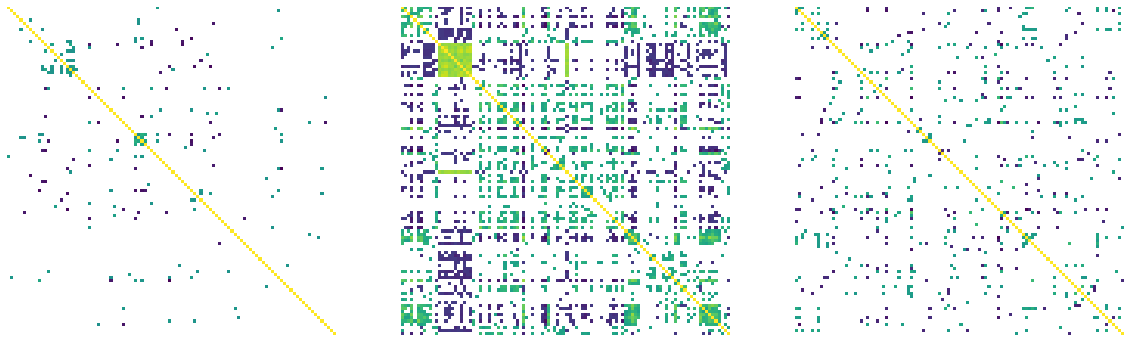

In [72]:
for correlation in thresholded_correlations:
    figure, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 15))

    for i, matrix in enumerate(correlation):
        axes[i].matshow(matrix)
        axes[i].set_axis_off()

plt.show()

In [73]:
statistics = pd.DataFrame()

# TODO: Should statistics be calculated for both Spearman and Pearson?

for i in range(0, 50, 1):
    i /= 100

    matrix = correlations[0][0][abs(correlations[0][0]) >= i]
    network = generate_network(matrix)

    line = pd.DataFrame({
        "Correlation method": "Spearman",
        "Threshold": [i],
        # TODO: Should we count only nodes with non-zero degree?
        "Number of nodes": [network.number_of_nodes()],
        "Number of edges": [network.number_of_edges()],
        "Average degree": [np.mean(list(dict(network.degree()).values()))],
        "Average clustering": [networkx.average_clustering(network)]
    })

    statistics = pd.concat([statistics, line])

display(statistics)

,Correlation method,Threshold,Number of nodes,Number of edges,Average degree,Average clustering
0,Spearman,0.00,106,5565,105.000000,1.000000
0,Spearman,0.01,106,5182,97.773585,0.931581
0,Spearman,0.02,106,4780,90.188679,0.861980
0,Spearman,0.03,106,4417,83.339623,0.799774
0,Spearman,0.04,106,4080,76.981132,0.744429
0,Spearman,0.05,106,3706,69.924528,0.685527
0,Spearman,0.06,106,3381,63.792453,0.634516
0,Spearman,0.07,106,3061,57.754717,0.587771
0,Spearman,0.08,106,2738,51.660377,0.541291
0,Spearman,0.09,106,2462,46.452830,0.508040


# Task 2

In [1]:
%pip install snfpy

You should consider upgrading via the '/Users/brunovaz/miniforge3/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import snf

dataframes = []

for dataset in ("Gene", "Methy", "Mirna"):
    dataframe = pd.read_csv(
        f"data/LUNG_{dataset}_Expression.txt", 
        header=0,
        sep="\t"
    )
    dataframe_cols = list(dataframe.columns[1:])
    dataframe_cols.append("no_col")
    dataframe.columns = dataframe_cols
    dataframe.drop("no_col", axis=1, inplace=True)
    dataframe = dataframe.transpose()

    dataframes.append(dataframe.values)

In [34]:
lung_survival = pd.read_csv(
    "data/LUNG_Survival.txt",
    header=0,
    sep="\t"
)

lung_survival["sample"] = lung_survival["PatientID"].apply(lambda x: x.split("-01A")[0])

lusc_clinical = pd.read_csv(
    "data/lusc.clinical.txt",
    header=0,
    sep="\t"
)

lusc_clinical["sample"] = lusc_clinical["sample"].apply(lambda x: x.replace(".", "-"))

# Join the two datasets
lung_survival_lusc_clinical = pd.merge(
    lung_survival, 
    lusc_clinical,
    how="inner",
    on="sample"
).drop("sample", axis=1)

# The patients are in the same order?
print(list(lung_survival_lusc_clinical.PatientID.values) == list(dataframe.index))

lung_survival_lusc_clinical

,PatientID,Survival,Death,gender,age_at_diagnosis,pathologic_stage,smoker
0,TCGA-18-3406-01A-01T-0981-13,371,0,MALE,67,Stage IA,YES
1,TCGA-18-3407-01A-01T-0981-13,227,0,MALE,72,Stage IB,YES
2,TCGA-18-3408-01A-01T-0981-13,2466,1,FEMALE,77,Stage IB,YES
3,TCGA-18-3410-01A-01T-0981-13,146,0,MALE,81,Stage IIB,YES
4,TCGA-18-3411-01A-01T-0981-13,1415,1,FEMALE,63,Stage IIIA,YES
...,...,...,...,...,...,...,...
101,TCGA-66-2792-01A-01T-0981-13,913,1,MALE,58,Stage IIB,YES
102,TCGA-66-2793-01A-01T-1517-13,306,0,MALE,68,Stage IIIB,YES
103,TCGA-66-2794-01A-01T-1517-13,1645,1,MALE,64,Stage IIIB,YES
104,TCGA-66-2795-01A-02T-0981-13,122,1,MALE,68,Stage IIIB,YES


In [35]:
affinity_networks = snf.make_affinity(
    dataframes, 
    metric='correlation', 
    K=20, 
    mu=0.5,
    normalize=True
)

fused_network = snf.snf(affinity_networks, K=20)

best, second = snf.get_n_clusters(fused_network)
print(f"Best number of clusters: {best}")
print(f"Second best number of clusters: {second}")

Best number of clusters: 4
Second best number of clusters: 2


In [95]:
from sklearn.cluster import spectral_clustering

clusters_best = spectral_clustering(
    fused_network, 
    n_clusters=best,
    random_state=42
)

clusters_second = spectral_clustering(
    fused_network, 
    n_clusters=second,
    random_state=42
)

In [100]:
lung_survival_lusc_clinical_clusters_best = (
    pd.concat(
        [
            lung_survival_lusc_clinical, 
            pd.Series(clusters_best, name="cluster_best")
        ], 
        axis=1
    )
)

lung_survival_lusc_clinical_clusters = (
    pd.concat(
        [
            lung_survival_lusc_clinical_clusters_best, 
            pd.Series(clusters_second, name="cluster_second")
        ], 
        axis=1
    )
)

display(
    lung_survival_lusc_clinical_clusters
    .groupby("cluster_best")
    .agg(
        {
            "Survival": ["min", "max", "mean", "std"],
            "age_at_diagnosis": ["min", "max", "mean", "std"],
        }
    )
)
# No que toca à variável survival, a média é bastante distinta em cada cluster

display(
    lung_survival_lusc_clinical_clusters
    .groupby("cluster_second")
    .agg(
        {
            "Survival": ["min", "max", "mean", "std"],
            "age_at_diagnosis": ["min", "max", "mean", "std"]
        }
    )
)

Survival                                 age_at_diagnosis      \
                  min   max         mean          std              min max   
cluster_best                                                                 
0                  53  3724  1147.750000  1022.473038               54  80   
1                  12  2983   796.750000   803.937928               39  83   
2                  12  3469   708.366667   792.909678               52  83   
3                  17  1470   489.464286   458.654109               47  84   

                                   
                   mean       std  
cluster_best                       
0             67.250000  8.508018  
1             66.472222  8.368260  
2             67.500000  8.207440  
3             67.000000  9.197423

Survival                               age_at_diagnosis      \
                    min   max        mean         std              min max   
cluster_second                                                               
0                    12  3724  776.953125  776.289740               39  84   
1                    12  3469  659.214286  758.769528               52  83   

                                     
                     mean       std  
cluster_second                       
0               66.906250  8.980965  
1               67.119048  7.683376

In [109]:
for i in lung_survival_lusc_clinical_clusters.cluster_best.unique():
    print("Cluster:", i)
    display(
        lung_survival_lusc_clinical_clusters[
            lung_survival_lusc_clinical_clusters["cluster_best"]==i
        ].pathologic_stage.value_counts()
    )

Cluster: 2


Stage IB      14
Stage IIB      8
Stage IIIB     3
Stage IA       2
Stage IV       2
Stage IIIA     1
Name: pathologic_stage, dtype: int64

Cluster: 1


Stage IB      11
Stage IIIA     7
Stage IIIB     6
Stage IIB      5
Stage IA       5
Stage IIA      2
Name: pathologic_stage, dtype: int64

Cluster: 0


Stage IB      7
Stage IIB     2
Stage IIIA    1
Stage IA      1
Stage IIA     1
Name: pathologic_stage, dtype: int64

Cluster: 3


Stage IB      15
Stage IIB      6
Stage IIIA     4
Stage IIA      1
Stage IIIB     1
Stage IA       1
Name: pathologic_stage, dtype: int64

In [110]:
for i in lung_survival_lusc_clinical_clusters.cluster_second.unique():
    print("Cluster:", i)
    display(
        lung_survival_lusc_clinical_clusters[
            lung_survival_lusc_clinical_clusters["cluster_second"]==i
        ].pathologic_stage.value_counts()
    )

Cluster: 1


Stage IB      17
Stage IIB      9
Stage IIIA     7
Stage IIIB     5
Stage IA       2
Stage IV       2
Name: pathologic_stage, dtype: int64

Cluster: 0


Stage IB      30
Stage IIB     12
Stage IA       7
Stage IIIA     6
Stage IIIB     5
Stage IIA      4
Name: pathologic_stage, dtype: int64